# Guía 4: Dinámica Cuántica

## Ejercicios de programación

1. Teniendo en cuenta sus resultados del último ejercicio de la guía anterior en el que resolvió numéricamente la ecuación diferencial $$u''(x) = -k^2 u(x)$$ en el intervalo $x = [0, 1]$ con las condiciones en la frontera de $u(0) = u(1) = 0$, introduzca ahora una evolución temporal. En este caso, al ser independiente del tiempo se tiene $$u_n(x, t) = u_n(x, 0) \cdot f_n(t),$$ donde $$f_n(t) = e^{-i k_n t}$$ Grafique la evolución para un estado simétrico y uno antisimétrico. Realice lo mismo con una combinación lineal de ambos estados.

In [ ]:
import time
from IPython import display
import matplotlib.pyplot as plt
import numpy as np

# defino los puntos en x para los que está definida u(x)
x = np.linspace(0, 2*np.pi)

# loop temporal
for t in np.linspace(0, 1, num=10):
    # grafico espacial para tiempo t
    plt.plot(x, np.sin(x) * np.exp(-1j * t))
    
    # configuración del grafico: límites, labels y título
    plt.xlim(0, 2 * np.pi)
    plt.ylim(-1, 1)
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(f"tiempo={t:.2f}")
    
    # muestro ese tiempo por 0.5 segundos
    display.display(plt.gcf())
    time.sleep(0.5)
    
    # limpio el grafico (con configuración y todo para que no se superponga
    # lo del tiempo anterior
    plt.cla()
    display.clear_output(wait=True)
    
# cierro el gráfico una vez que termina la visualización
display.clear_output()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def estado(x, k):
    h = np.diff(x)[0]
    
    u = np.zeros(len(x))
    u[1] = h
    
    for i in range(1, len(x) - 1):
        u[i + 1] = 2 * u[i] * (1 - k**2 * (5 * h**2)/12)/(1 + k**2 * (h**2)/12) - u[i - 1]
        
    return u

npoints = 100
x = np.linspace(0, 1, npoints)

us = estado(x, np.pi)
ua = estado(x, 2 * np.pi)
    
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()

timesteps = 100
for t in np.linspace(0, 2*np.pi, num=50):
    ut = us * np.exp(-1j * np.pi * t) + ua * np.exp(-1j * 2 * np.pi * t)

    plt.plot(x, ut, color="tab:blue")
    
    # configuración del grafico: límites, labels y título
    plt.xlim(0, 1)
    plt.ylim(-0.5, 0.5)
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(f"tiempo={t:.2f}")
    
    # muestro ese tiempo por 0.5 segundos
    display.display(plt.gcf())
    time.sleep(0.5)
    
    # limpio el grafico (con configuración y todo para que no se superponga
    # lo del tiempo anterior
    plt.cla()
    display.clear_output(wait=True)
    
# cierro el gráfico una vez que termina la visualización
display.clear_output()

2. Ahora al problema anterior realicelo considerando $k^2 = 2(E - V(x))$ para un potencial $V(x)$ que sea una barrera en el centro de la caja. _Ayuda_: puede ser de utilidad consultar el siguiente [trabajo](https://www.researchgate.net/publication/281409877_Exact_Solutions_of_the_Quantum_Double-Square-Well_Potential).

18
-3.5367681523734706e-07 [12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551  8.36216011  8.36216011
  8.36216011  8.36216011  8.36216011  8.36216011  8.36216011  8.36216011
  8.36216011  8.36216011  8.36216011  8.36216011  8.36216011  8.36216011
  8.36216011  8.36216011  8.36216011  8.36216011  8.36216011  8.36216011
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551 12.26747551
 12.26747551 12.26747551

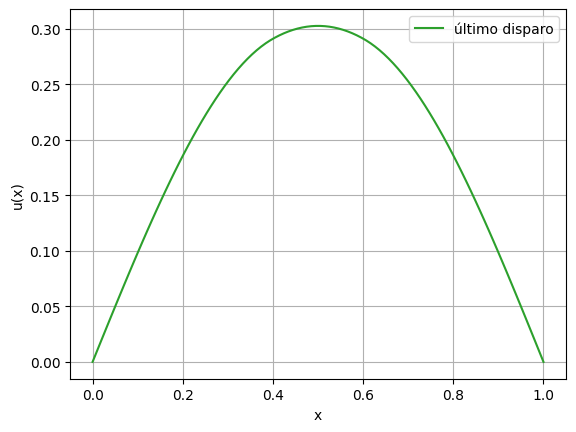

In [39]:
import matplotlib.pyplot as plt
import numpy as np

npoints = 100
x = np.linspace(0, 1, npoints)
h = np.diff(x)[0]
tol = 1e-6
v0 = 5.0

k0 = np.full(npoints, 2 * 0.1)
k0[40:60] = 2 * (0.1 - v0)

k1 = np.full(npoints, 2 * 10.0)
k1[400:60] = 2 * (10.0 - v0)

u = np.zeros(npoints)
u[1] = h
    
k = k0

aux = h**2 / 12.0
for i in range(1, npoints - 1):
    u[i + 1] = (2.0 * (1.0 - 5.0 * aux * k[i]) * u[i] - (1.0 + aux * k[i - 1]) * u[i - 1]) / (1.0 + 5.0 * aux * u[i + 1])

# plt.plot(x, u, color="tab:red", label="primer disparo")

uprev = u[-1]

for j in range(1000):
    u = np.zeros(npoints)
    u[1] = h
    
    k = (k0 + k1) / 2
    
    for i in range(1, npoints - 1):
        u[i + 1] = (2.0 * (1.0 - 5.0 * aux * k[i]) * u[i] - (1.0 + aux * k[i - 1]) * u[i - 1]) / (1.0 + 5.0 * aux * u[i + 1])
    
    if uprev * u[-1] < 0:
        k1 = k
    else:
        k0 = k
        uprev = u[-1]

    # plt.plot(x, u, color="k")

    if np.abs(u[-1]) < tol:
        print(j)
        break
        
print(u[-1], k)
    
plt.xlabel("x")
plt.ylabel("u(x)")
plt.plot(x, u, color="tab:green", label="último disparo")
plt.legend()
plt.grid()
plt.show()